In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
mnist=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
model=keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28,1)),
                               keras.layers.Dense(128,activation='relu'),
                               keras.layers.Dense(10,activation='sigmoid')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8687 - loss: 0.4601 - val_accuracy: 0.9662 - val_loss: 0.1262
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9643 - loss: 0.1269 - val_accuracy: 0.9738 - val_loss: 0.0934
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9772 - loss: 0.0785 - val_accuracy: 0.9750 - val_loss: 0.0837
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0555 - val_accuracy: 0.9797 - val_loss: 0.0762
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9877 - loss: 0.0432 - val_accuracy: 0.9798 - val_loss: 0.0708


In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0794


[0.07062260806560516, 0.9761999845504761]

In [ ]:
y_pred=model.predict(x_test)a

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
import numpy as np
ypred1=np.argmax(y_pred,axis=1)
ypred1

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
x_test[0].shape
import numpy as np

prediction = model.predict(x_test[7808].reshape(1, 28, 28))
print(prediction)
print(np.argmax(prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[3.2039080e-04 6.2096860e-06 1.9005791e-03 5.3118416e-03 2.5810928e-03
  9.9999887e-01 1.0643256e-02 4.6323378e-02 9.1701202e-02 6.8880773e-01]]
5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


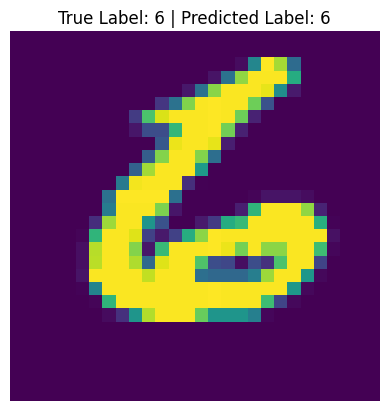

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

index = 9999

y_pred = model.predict(x_test[index].reshape(1, 28, 28))
y_pred1 = np.argmax(y_pred)

y_true = y_test[index]

plt.imshow(x_test[index])
plt.title(f"True Label: {y_true} | Predicted Label: {y_pred1}")
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
d1=pd.DataFrame({'actual':y_test,'predicted':ypred1})
d1

,actual,predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


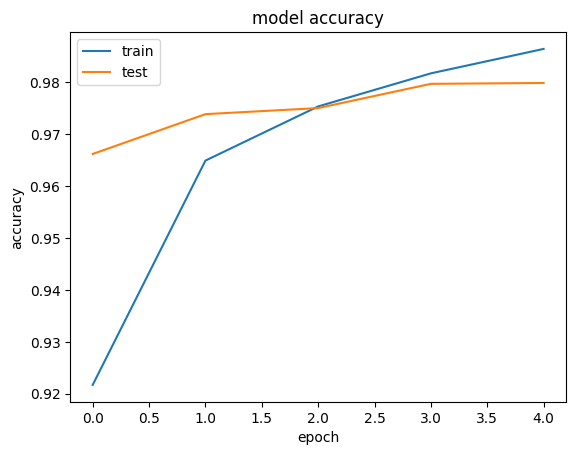

In [ ]:

import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()